In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
import datetime
from math import sin, cos, sqrt, atan2, radians

ds = pd.read_csv('taxi-trips.csv')
print("Yunus Emre Güney 21003")




Yunus Emre Güney 21003


In [2]:
print("Shape of data set means dimensionality  which is how many attributes a dataset has.\n ds.shape returns number of entititys and columns as a tuple")
ds.shape

Shape of data set means dimensionality  which is how many attributes a dataset has.
 ds.shape returns number of entititys and columns as a tuple


(118185, 11)

In [3]:

print("We can check data types of each column")
ds.dtypes

We can check data types of each column


id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [4]:
print("Descriptive statistics of our data")
ds.describe()  

Descriptive statistics of our data


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [5]:

pickup_coords = ds[['pickup_latitude', 'pickup_longitude']].apply(tuple, axis=1).tolist()
dropoff_coords = ds[['dropoff_latitude', 'dropoff_longitude']].apply(tuple, axis=1).tolist()

pickup_results = rg.search(pickup_coords, mode=2)
ds['pickup_district'] = [x['name'] for x in pickup_results]

dropoff_results = rg.search(dropoff_coords, mode=2)
ds['dropoff_district'] = [x['name'] for x in pickup_results]

ds.head()




Loading formatted geocoded file...


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


In [6]:
print("Top 5 districts passengers leave")
ds['pickup_district'].value_counts().nlargest(5)




Top 5 districts passengers leave


Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64

In [7]:
print("Top 5 destinations")
ds['dropoff_district'].value_counts().nlargest(5)


Top 5 destinations


Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: dropoff_district, dtype: int64

In [8]:
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c
ds['distance'] = ds.apply(lambda row: calculate_distance(row['pickup_latitude'],row['dropoff_longitude'],row['dropoff_latitude'],row['pickup_longitude']),axis=1)
ds.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.498991
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Long Island City,5.122769
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Weehawken,1.492705
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Manhattan,1.972825
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2.517838


In [9]:
def categorizeTime(dateTime):
    d = dateTime.partition(" ")[2]
    time = int(d[0:2])
    if time >= 7 and time <= 9:
           return "rush_hour_morning"
    elif time >=9 and time <=16:
            return "afternoon"
    elif time>=16 and time<=18:
        return "rush_hour_evening"
    elif time>=18 and time <=23:
        return "evening"
    elif time>23 or time <=6:
        return "late_night"
    
    
    

ds['time_of_day'] = ds.agg(lambda row: categorizeTime(row['pickup_datetime']),axis=1)
ds.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.498991,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Long Island City,5.122769,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Weehawken,1.492705,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Manhattan,1.972825,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2.517838,afternoon


Distance vs Time of Day


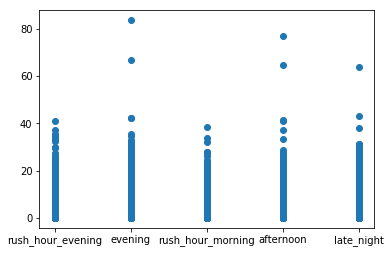

Avarage distances
time_of_day
afternoon            3.174017
evening              3.570242
late_night           4.152666
rush_hour_evening    3.142058
rush_hour_morning    3.050168
Name: distance, dtype: float64
Trip Duration vs Time of Day


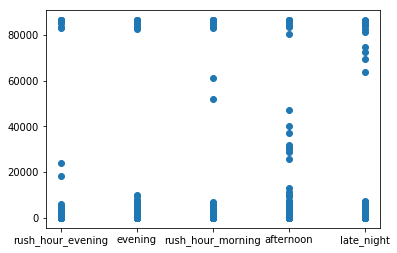

Avarage trip duration
time_of_day
afternoon            978.032887
evening              886.287120
late_night           850.311514
rush_hour_evening    963.484210
rush_hour_morning    931.361840
Name: trip_duration, dtype: float64


In [10]:
print("Distance vs Time of Day")
plt.scatter(ds["time_of_day"],ds["distance"])
plt.show()
print("Avarage distances")
distanceMeans= ds.groupby('time_of_day')['distance'].mean()
print(distanceMeans)


print("Trip Duration vs Time of Day")

plt.scatter(ds["time_of_day"],ds["trip_duration"])
plt.show()
print("Avarage trip duration")
tripDurationMeans = ds.groupby('time_of_day')['trip_duration'].mean()
print(tripDurationMeans)


In [11]:
print("Correlation coefficient is very low so passenger group size has no affect on distance")
ds['passenger_count'].corr(ds['distance'])


Correlation coefficient is very low so passenger group size has no affect on distance


0.005972277211761945

In [12]:
def dateToDay(date):
    dateobj = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    if dateobj.weekday() == 0:
        return "Monday"
    elif dateobj.weekday() ==1:
        return "Tuesday"
    elif dateobj.weekday() ==2:
        return "Wednesday"
    elif dateobj.weekday() ==3:
        return "Thursday"
    elif dateobj.weekday() ==4:
        return "Friday"
    elif dateobj.weekday()==5:
        return "Saturday"
    elif dateobj.weekday() ==6:
        return "Sunday"
    
ds['weekday'] = ds.apply(lambda row: dateToDay(row['dropoff_datetime']),axis=1)
print("Sunday has highest mean of distance but saturday is lower than all other weekdays so there is no increase relation between distance and weekends")
ds.groupby('weekday')['distance'].agg(['mean', 'std'])





    
    

Sunday has highest mean of distance but saturday is similar to  other weekdays so there is no increase relation between distance and weekends


,mean,std
weekday,,
Friday,3.326404,3.865184
Monday,3.419070,4.089388
Saturday,3.295977,3.605539
Sunday,3.749627,4.131435
Thursday,3.353990,3.794768
Tuesday,3.322489,3.825071
Wednesday,3.346666,3.819427
